In [8]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors,ticker
from cartopy import crs,feature
import cartopy.crs as ccrs
import scipy.ndimage as ndimage
import datetime
from dask.diagnostics import ProgressBar

In [275]:
ds2 = xr.open_dataset("http://hfrnet-tds.ucsd.edu/thredds/dodsC/HFR/USWC/2km/hourly/RTV/HFRADAR_US_West_Coast_2km_Resolution_Hourly_RTV_best.ncd",chunks={'time': 49})
ds2 = ds2.sel(lat=slice(32,42.5),lon=slice(-126,-120.4717))

ds6 = xr.open_dataset("http://hfrnet-tds.ucsd.edu/thredds/dodsC/HFR/USWC/6km/hourly/RTV/HFRADAR_US_West_Coast_6km_Resolution_Hourly_RTV_best.ncd",chunks={'time': 49})
ds6 = ds6.sel(lat=slice(32,42.5),lon=slice(-126,-120.4717))

ds1 = xr.open_dataset("http://hfrnet-tds.ucsd.edu/thredds/dodsC/HFR/USWC/1km/hourly/RTV/HFRADAR_US_West_Coast_1km_Resolution_Hourly_RTV_best.ncd",chunks={'time': 49})
ds1 = ds1.sel(lat=slice(32,42.5),lon=slice(-126,-120.4717))

ds500 = xr.open_dataset("http://hfrnet-tds.ucsd.edu/thredds/dodsC/HFR/USWC/500m/hourly/RTV/HFRADAR_US_West_Coast_500m_Resolution_Hourly_RTV_best.ncd",chunks={'time': 49})
ds500 = ds500.sel(lat=slice(32,42.5),lon=slice(-126,-120.4717))

In [281]:
def get_coverage(ds,fname):
    ProgressBar().register()
    timeEnd = ds.time.max()
    timeStart = timeEnd-np.timedelta64(31,'D')
    recent_data = ds.sel(time=slice(timeStart,timeEnd))
    spatial_var = (np.isfinite(recent_data['u']).sum(dim={'time'}) / recent_data['time'].shape)
    Z2 = ndimage.gaussian_filter(spatial_var.values,sigma=1)
    spatial_var['smooth'] = (spatial_var.dims,Z2)
    spatial_var['smooth'] = spatial_var['smooth'].where(spatial_var['smooth'] != 0) 
    spatial_var.to_netcdf('Data/{}.nc'.format(fname))

get_coverage(ds2,'2km_coverage')
get_coverage(ds6,'6km_coverage')
get_coverage(ds1,'1km_coverage')
get_coverage(ds500,'500m_coverage')
    

[########################################] | 100% Completed | 52.0s
[########################################] | 100% Completed | 52.0s
[########################################] | 100% Completed | 52.1s
[########################################] | 100% Completed | 52.2s
[########################################] | 100% Completed | 52.3s
[########################################] | 100% Completed | 52.4s
[########################################] | 100% Completed | 52.4s
[########################################] | 100% Completed | 52.4s
[########################################] | 100% Completed | 52.5s
[########################################] | 100% Completed | 52.5s
[########################################] | 100% Completed | 52.5s
[########################################] | 100% Completed | 52.6s
[########################################] | 100% Completed | 52.7s
[########################################] | 100% Completed | 52.7s
[########################################] | 100

In [299]:
ds_500m = xr.open_dataset('Data/500m_coverage.nc')
ds_1km = xr.open_dataset('Data/1km_coverage.nc')
ds_2km = xr.open_dataset('Data/2km_coverage.nc')
ds_6km = xr.open_dataset('Data/6km_coverage.nc')
# ds_1km['smooth'].plot()
# ds_2km['smooth'].plot()
# ds_6km['smooth'].plot()

In [257]:
bml = df.query("affiliation == 'BML'")
codar = df.query("affiliation == 'CODAR'")
slo = df.query("affiliation == 'SLO'")

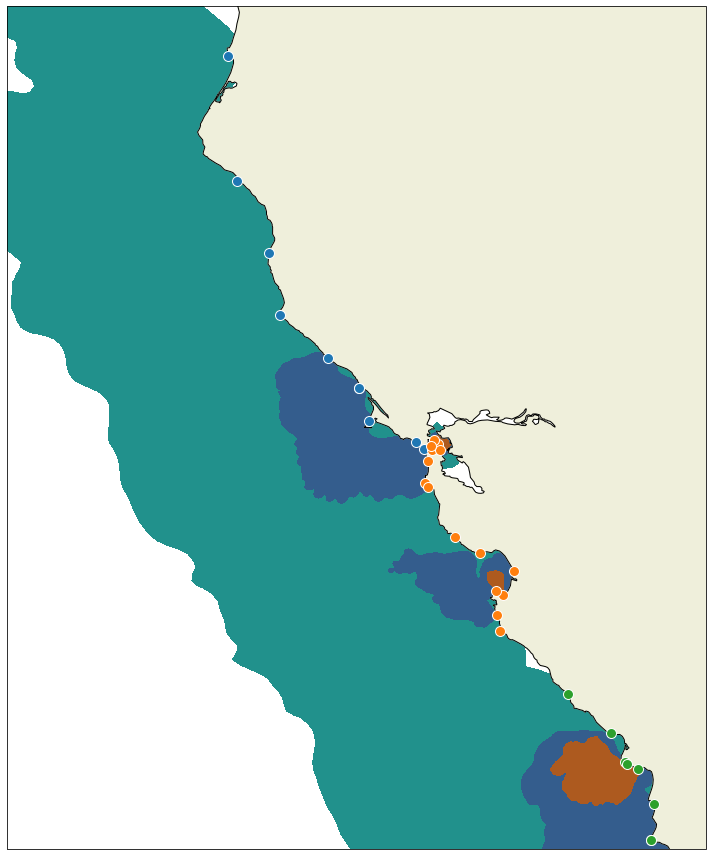

In [310]:
fig=plt.figure(figsize=(12,12))
ax = plt.axes(projection=crs.PlateCarree())

# xx,yy = np.meshgrid(ds_500m.lon,ds_500m.lat)
# ax.contourf(xx,yy,ds_500m['smooth'],[.10,1],zorder=10,colors='#345D8D')
xx,yy = np.meshgrid(ds_1km.lon,ds_1km.lat)
ax.contourf(xx,yy,ds_1km['smooth'],[.10,1],zorder=0,colors='#AD5A1F')
xx,yy = np.meshgrid(ds_2km.lon,ds_2km.lat)
ax.contourf(xx,yy,ds_2km['smooth'],[.10,1],zorder=-2,colors='#345D8D')

xx,yy = np.meshgrid(ds_6km.lon,ds_6km.lat)
ax.contourf(xx,yy,ds_6km['smooth'],[.10,1],zorder=-5)

ax.scatter(bml['X'].values, bml['Y'].values,transform=ccrs.PlateCarree(),zorder=10,s=100,edgecolor='w')
ax.scatter(codar['X'].values, codar['Y'].values,transform=ccrs.PlateCarree(),zorder=10,s=100,edgecolor='w')
ax.scatter(slo['X'].values, slo['Y'].values,transform=ccrs.PlateCarree(),zorder=10,s=100,edgecolor='w')


# ax.plot(goodGrid.lon,goodGrid.lat,'.',markersize=.4,color='black')

ax.add_feature(feature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='face',facecolor=feature.COLORS['land']))
# plt.colorbar(CF,label="Percent Coverage")
ax.coastlines(resolution='10m',color='k')
plt.tight_layout()
ax.set_ylim(34.5,41.485)

gl = ax.gridlines()
# manipulate `gridliner` object
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlines = False
gl.ylines = False
plt.savefig('Data/HFR_map.png',dpi=300,)

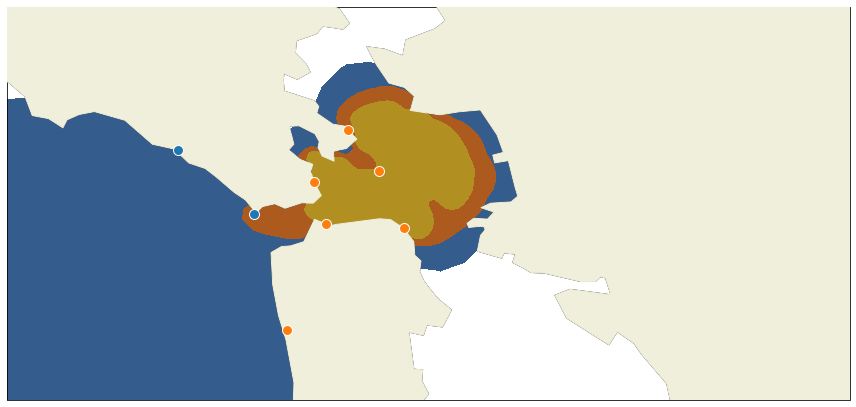

In [329]:
fig=plt.figure(figsize=(12,12))
ax = plt.axes(projection=crs.PlateCarree())

xx,yy = np.meshgrid(ds_500m.lon,ds_500m.lat)
ax.contourf(xx,yy,ds_500m['smooth'],[.10,1],zorder=4,colors='#B28F21')
xx,yy = np.meshgrid(ds_1km.lon,ds_1km.lat)
ax.contourf(xx,yy,ds_1km['smooth'],[.10,1],zorder=0,colors='#AD5A1F')
xx,yy = np.meshgrid(ds_2km.lon,ds_2km.lat)
ax.contourf(xx,yy,ds_2km['smooth'],[.10,1],zorder=-2,colors='#345D8D')

# xx,yy = np.meshgrid(ds_6km.lon,ds_6km.lat)
# ax.contourf(xx,yy,ds_6km['smooth'],[.10,1],zorder=-5)

ax.scatter(bml['X'].values, bml['Y'].values,transform=ccrs.PlateCarree(),zorder=10,s=100,edgecolor='w')
ax.scatter(codar['X'].values, codar['Y'].values,transform=ccrs.PlateCarree(),zorder=10,s=100,edgecolor='w')
ax.scatter(slo['X'].values, slo['Y'].values,transform=ccrs.PlateCarree(),zorder=10,s=100,edgecolor='w')


# ax.plot(goodGrid.lon,goodGrid.lat,'.',markersize=.4,color='black')

ax.add_feature(feature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='face',facecolor=feature.COLORS['land']),zorder=6)
# plt.colorbar(CF,label="Percent Coverage")
ax.coastlines(resolution='10m',color='k')
plt.tight_layout()
ax.set_ylim(37.65,38)
ax.set_xlim(-122.75,-122)

gl = ax.gridlines()
# manipulate `gridliner` object
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlines = False
gl.ylines = False
plt.savefig('Data/HFR_map_sfbay.png',dpi=300,)

In [198]:
df = pd.read_csv('Data/ss.csv')
df['station_name'] = df['description'].apply(lambda x: x.split("</b>")[0].strip('<div>').strip('b>'))
df['station_id'] = df['description'].apply(lambda x: x.split("<br/>")[1].strip('<div>').split(': ')[1])
df['affiliation'] = df['description'].apply(lambda x: x.split("<br/>")[2].split(': ')[1])

## 1km + 500 m

In [269]:
ProgressBar().register()
last_week = ds1.sel(time=slice(timeStart,timeEnd))
spatial_var = (np.isfinite(last_week['u']).sum(dim={'time'}) / last_week['time'].shape)
# spatial_var = spatial_var.where(spatial_var != 0) 

lon1km,lat1km=np.meshgrid(spatial_var.lon.values, spatial_var.lat.values)
# # # Smooth with gaussian filter
Z2 = ndimage.gaussian_filter(spatial_var.values,sigma=1)

# spatial_var['smooth'] = (spatial_var.dims,Z2)
# spatial_var['smooth'] = spatial_var['smooth'].where(spatial_var['smooth'] != 0) 

[########################################] | 100% Completed |  3min 10.9s
[########################################] | 100% Completed |  3min 10.9s
[########################################] | 100% Completed |  3min 10.9s
[########################################] | 100% Completed |  3min 11.0s
[########################################] | 100% Completed |  3min 11.1s
[########################################] | 100% Completed |  3min 11.1s
[########################################] | 100% Completed |  3min 11.2s
[########################################] | 100% Completed |  3min 11.2s
[########################################] | 100% Completed |  3min 11.2s
[########################################] | 100% Completed |  3min 11.3s
[########################################] | 100% Completed |  3min 11.3s
[########################################] | 100% Completed |  3min 11.4s
[########################################] | 100% Completed |  3min 11.4s
[#####################################

In [270]:
spatial_var['smooth'] = (spatial_var.dims,Z2)
spatial_var['smooth'] = spatial_var['smooth'].where(spatial_var['smooth'] != 0) 

/home/pdaniel/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/pdaniel/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


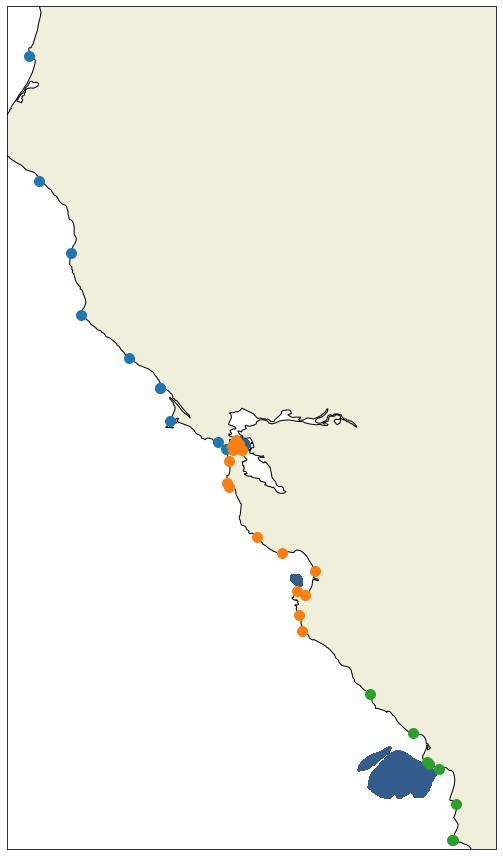

In [271]:
fig=plt.figure(figsize=(12,12))
ax = plt.axes(projection=crs.PlateCarree())
# ax.gridlines(linewidth=.5, color='gray', alpha=0.5, linestyle='-')

# ax.set_title('RTV Coverage')

# ax.contourf(lon2km,lat2km,percentCoverage_smooth_2km,[30,100],zorder=-1,colors='k')
# ax.contourf(lon2km,lat2km,percentCoverage_smooth_2km,[20,100],zorder=-1,colors='None',edgecolor='k')
ax.contourf(lon1km,lat1km,spatial_var['smooth'],[.30,1],zorder=-1,colors='#345D8D')

# ax.contourf(lon,lat,percentCoverage_smooth,[50,100],zorder=-3,alpha=.7)
ax.scatter(bml['X'].values, bml['Y'].values,transform=ccrs.PlateCarree(),zorder=10,s=100)
ax.scatter(codar['X'].values, codar['Y'].values,transform=ccrs.PlateCarree(),zorder=10,s=100)
ax.scatter(slo['X'].values, slo['Y'].values,transform=ccrs.PlateCarree(),zorder=10,s=100)




# ax.plot(goodGrid.lon,goodGrid.lat,'.',markersize=.4,color='black')

ax.add_feature(feature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='face',facecolor=feature.COLORS['land']))
# plt.colorbar(CF,label="Percent Coverage")
ax.coastlines(resolution='10m',color='k')
plt.tight_layout()
ax.set_ylim(34.5,41.485)

gl = ax.gridlines()
# manipulate `gridliner` object
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlines = False
gl.ylines = False
# plt.savefig('Data/HFR_map.png',dpi=300,)

In [333]:
df = pd.read_csv('Data/stations.txt',delimiter='\t')

In [341]:
df['freqs'] = df['freq'].round()
df.groupby('freqs')['network'].count()

freqs
4.0      1
5.0     10
12.0     4
13.0     8
14.0     3
24.0     2
25.0     1
41.0     4
44.0     1
Name: network, dtype: int64